In [5]:
# %load read_csv.py
# Reads CSV file and returns train and test set


import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import glob
import os
from sklearn.preprocessing import Imputer


# A visual check on the graph shows that none of the 13 prediction variables are correlated
# find_best_prediction_variables('/home/zack/Desktop/ML/AI_CLASS/Data/reProcessedHungarianData')

def split_all_data(prediction_vars):
    # folder with all data: reProcessedCleveland, reProcessedHungarian, reProcessedSwitzerland, reProcessedVA
    data_dir = r'/home/zack/AI_CLASS/Data/'
    os.chdir(data_dir)

    data_list = []

    # grab all files with part-name reProcessed
    # slip by ',' and ' '
    # Empty values = '?'
    # Combine all into one dataset
    for file in glob.glob('reProcessed*'):
        df = pd.read_csv(file, index_col=None, header=0, sep=' |,', engine='python', na_values=["?"])
        data_list.append(df)

    results = pd.concat(data_list)

    # Strategy 1: Drop all NaN Rows.
    results.dropna(inplace=True)

    # Strategy 2: fill missing values with mean column values
    # results.fillna(results.mean(), inplace=True)
    # print(results)

    # Strategy 3: .....

    # split into train and test dataset
    train, test = train_test_split(results, test_size=0.3)

    # train variables
    train_x = train[prediction_vars]
    # train output
    train_y = train.num

    # test variables
    test_x = test[prediction_vars]
    # test variables
    test_y = test.num

    return [train_x, train_y, test_x, test_y, results]











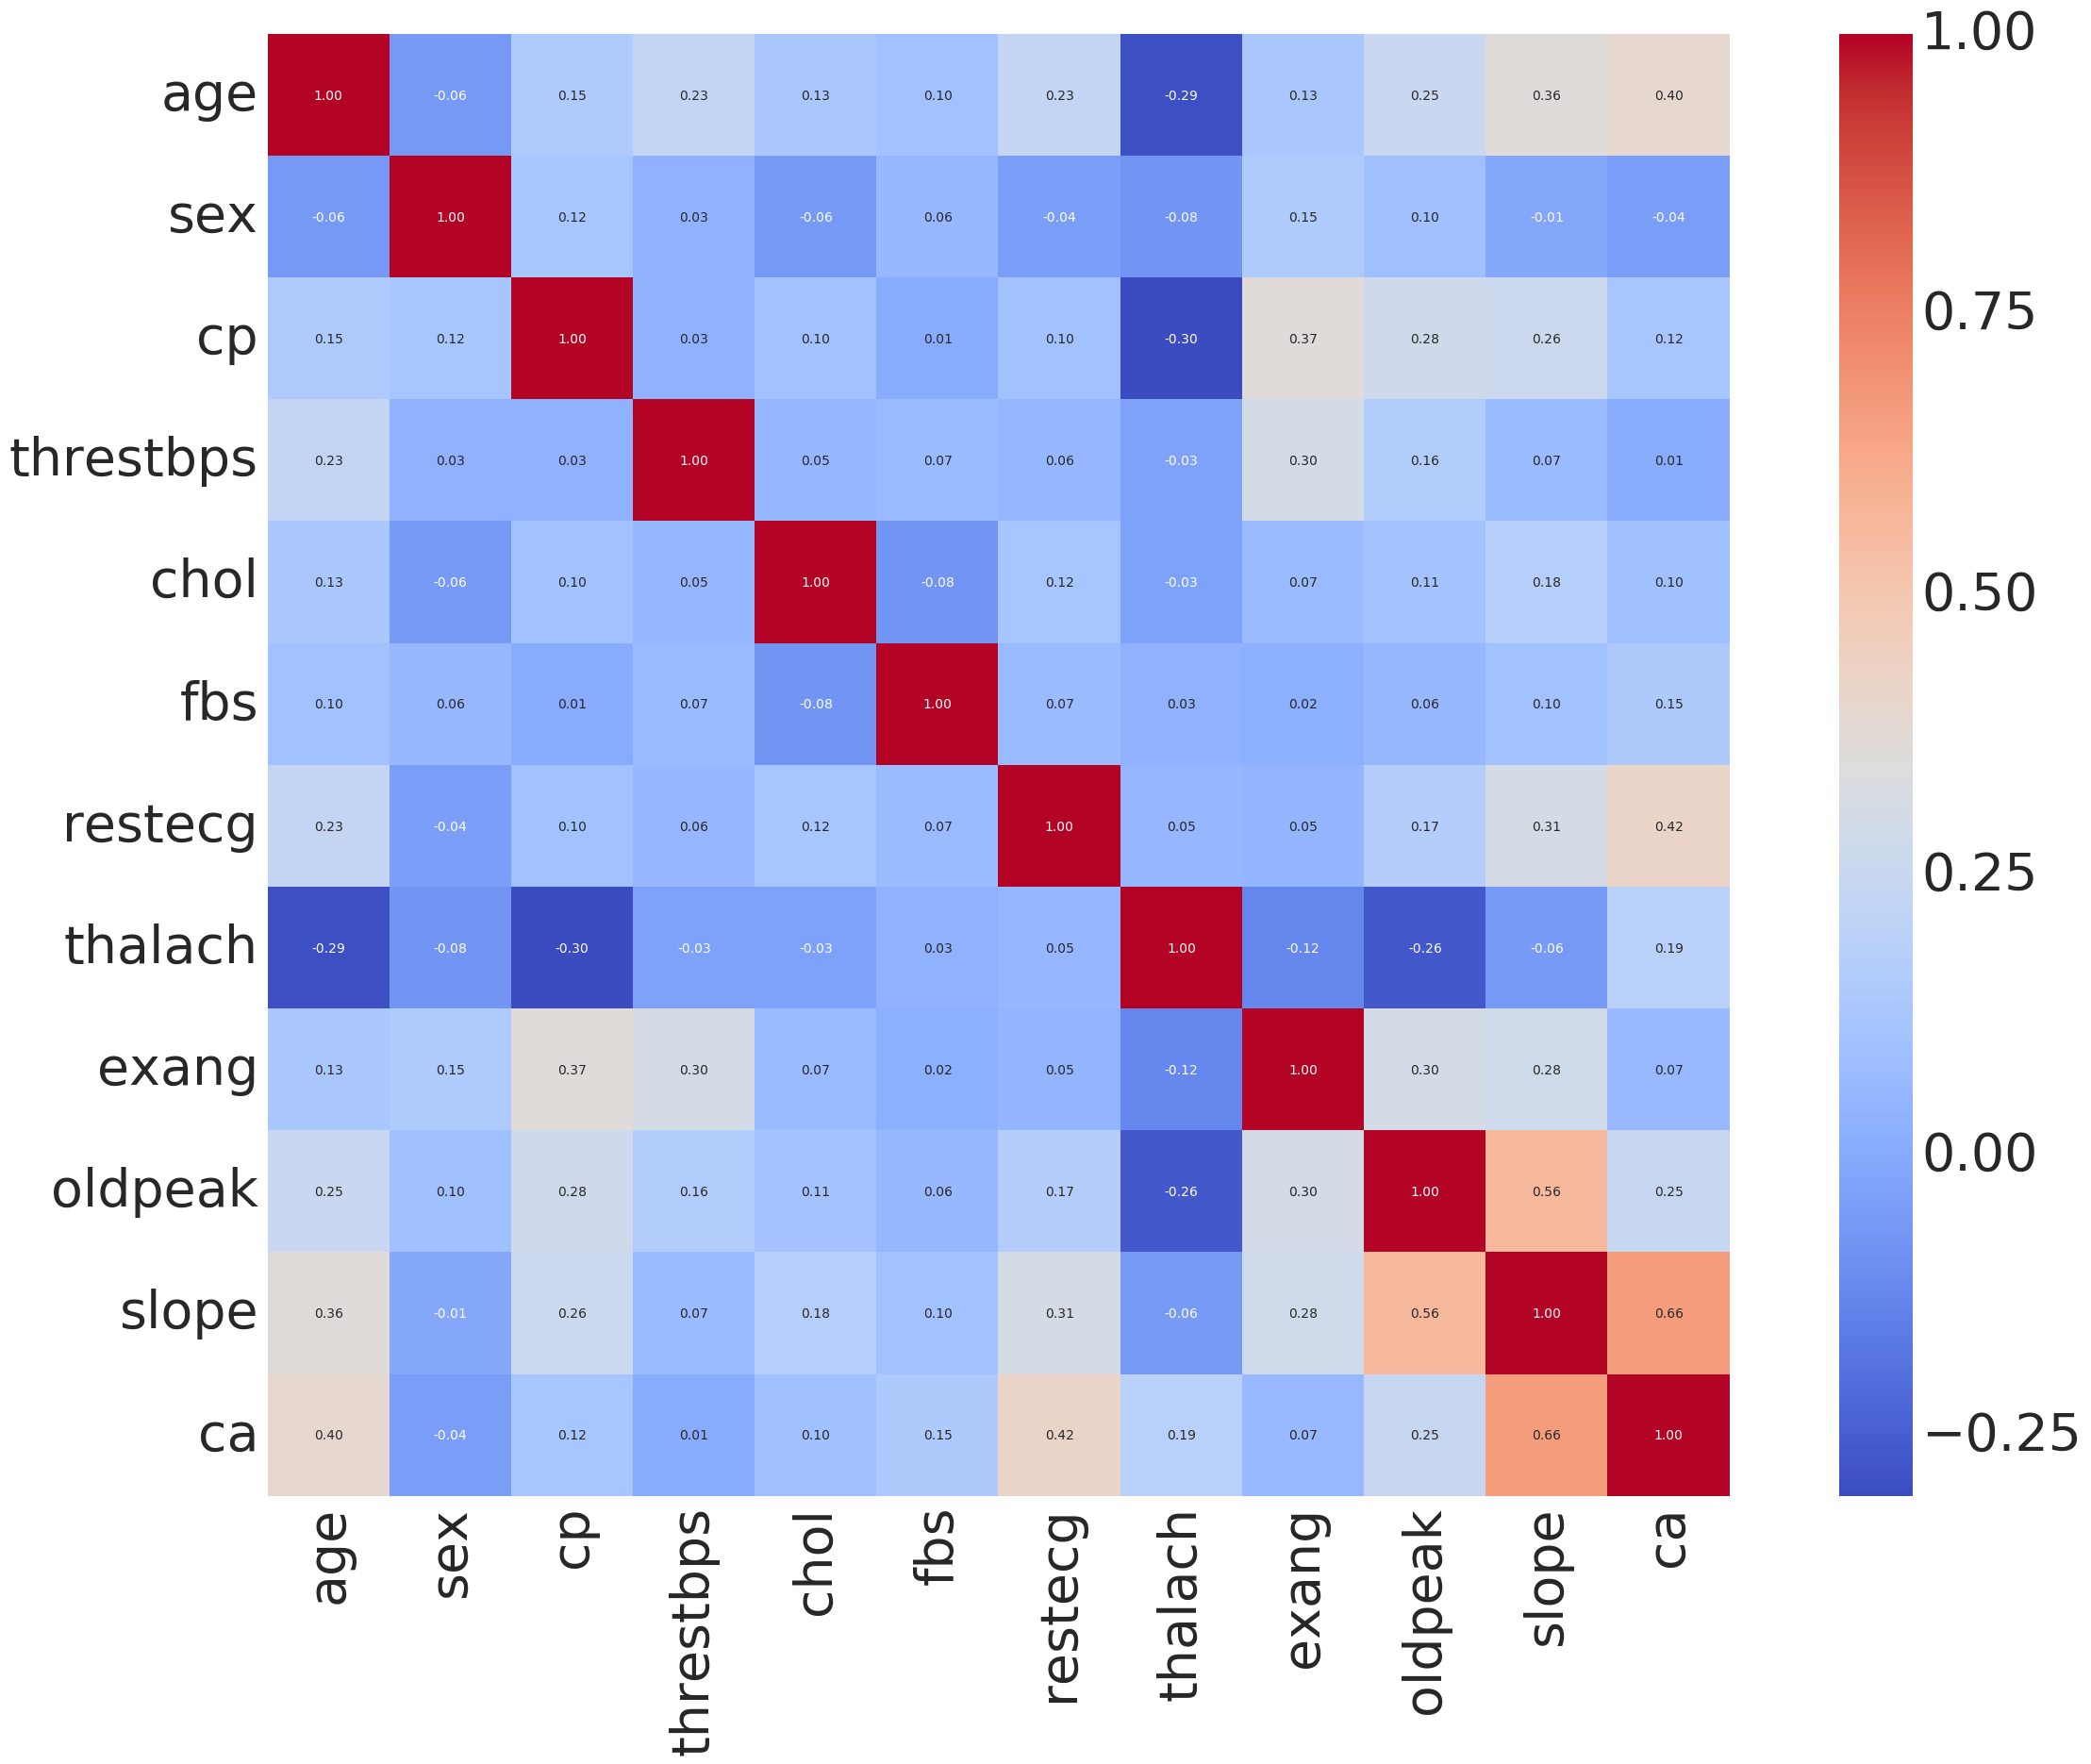

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# prediction variables
prediction_variables = ['age', 'sex', 'cp', 'threstbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak',
                            'slope', 'ca', 'thal']



data = split_all_data(prediction_variables)
train_x = data[0]
train_y = data[1]
test_x = data[2]
test_y = data[3]
cross_validation_data = data[4]
all_data = data[4]

def find_best_prediction_variables(data):
    # variables that are used to predict are in columns 0 - 12
    pred_variables = list(data.columns[0:12])
    # find correlation between all prediction variables
    corr = data[pred_variables].corr()
    # plot figure
    plt.figure(figsize=(30 , 20))
    # map features
    sns.set(font_scale=4)
    sns.heatmap(corr, cbar=True, square=True, annot=True, fmt='.2f', annot_kws={'size': 10}, xticklabels=pred_variables,
                yticklabels=pred_variables, cmap='coolwarm')
    plt.show()
    
find_best_prediction_variables(all_data)


In [11]:
# Grid search to find best parameters
# use grid search CV to find the parameters for prediction using decision trees
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
import numpy as np
import pandas as pd
# Grid Search CV model
def model_grid_search_cv(model, param_grid, data_x, data_y):
    clf = GridSearchCV(model, param_grid, cv=5, scoring="accuracy")
    clf.fit(train_x, train_y)
    print("Best Parameters: ")
    print(clf.best_params_)
    print("Best Accuracy Score: ")
    print(clf.best_score_)

    return clf.best_params_


In [12]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
import numpy as np
import pandas as pd
# Grid Search Model for Random Forest
def random_forest_grid_search():
    model = RandomForestClassifier()
    parameters_grid = [
        {
            'n_estimators': [10, 50, 100, 150, 200],
            'criterion' : ['gini' , 'entropy'],
            'max_features' : ['auto' , 'sqrt' , 'log2'],
            'max_depth': [5, 10, 15, 40],
            'min_samples_leaf': [1, 2, 3, 4, 5]

        }
    ]
    model_grid_search_cv(model, parameters_grid, train_x, train_y)

In [13]:
# Cross validation model
# Cross Validation of Models: Prevent over-fitting

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.preprocessing import Imputer
from sklearn.model_selection import KFold
import numpy as np
import pandas as pd
def classification_model(model, data, prediction_input, output):
    # fit using training set
    model.fit(data[prediction_input], data[output])
    # predict based on training set
    predictions = model.predict(data[prediction_input])
    # accuracy
    accuracy = accuracy_score(predictions, data[output])
    print ("Accuracy: ", accuracy)

    # create 5 partitions
    kf = KFold(n_splits=5)

    error = []

    # Split dataset into 5 consecutive folds
    for train, test in kf.split(data):
        # rows & columns
        train_X = (data[prediction_input].iloc[train,:])
        # rows
        train_y = data[output].iloc[train]
        model.fit(train_X, train_y)

        # test data also
        test_X = data[prediction_input].iloc[test, :]
        test_y = data[output].iloc[test]
        error.append(model.score(test_X, test_y))

        # score
        print("Cross Validation score: ", np.mean(error))



In [ ]:
# To Crossvalidation, pass best parameters
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.preprocessing import Imputer
from sklearn.model_selection import KFold
import numpy as np
import pandas as pd
import time
start = time.time()
best_rf_params = random_forest_grid_search()
def cross_validation_RF_Classifier():
    model = RandomForestClassifier(**best_rf_params)
    outcome_var = "num"
    classification_model(model, cross_validation_data, prediction_variables, outcome_var)
    
print("-----Cross Validation Results with best Params-----")
cross_validation_RF_Classifier()

end = time.time()
print("----Time s taken on GCP w/52GB RAM and 8vCPUs/Intel Ivy Bridge---")
print(end - start)